### DATA INGESTION AND QUALITY PROFILING###

### 1.1. Load and Inspect###

In [3]:
import pandas as pd

In [4]:
#Load the dataset

In [15]:
df=pd.read_csv('Desktop/DHL_Facilities.csv')

In [16]:
#Display data types and record count

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24072 entries, 0 to 24071
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             24072 non-null  float64
 1   Y             24072 non-null  float64
 2   OBJECTID      24072 non-null  int64  
 3   FEATURE_ID    24072 non-null  int64  
 4   NAME          24072 non-null  object 
 5   ADDRESS       24072 non-null  object 
 6   ADDRESS2      24072 non-null  object 
 7   CITY          24072 non-null  object 
 8   STATE         24072 non-null  object 
 9   ZIP           24072 non-null  int64  
 10  LATITUDE      24072 non-null  float64
 11  LONGITUDE     24072 non-null  float64
 12  MATCH_STATUS  24072 non-null  object 
 13  PLACEMENT     24072 non-null  object 
 14  CENSUS_CODE   24072 non-null  object 
 15  LAST_PICKUP   24072 non-null  object 
 16  LOCATION_TY   24072 non-null  object 
 17  LOCATION_TH   24072 non-null  object 
dtypes: float64(4), int64(3), o

In [18]:
print(f"Total Records:{len(df)}")

Total Records:24072


### 1.2 Missing and Anamoly Detection ###

In [19]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt

In [21]:
#Quantify nulls per column

In [23]:
null_counts=df.isnull().sum()

In [24]:
print(null_counts)

X               0
Y               0
OBJECTID        0
FEATURE_ID      0
NAME            0
ADDRESS         0
ADDRESS2        0
CITY            0
STATE           0
ZIP             0
LATITUDE        0
LONGITUDE       0
MATCH_STATUS    0
PLACEMENT       0
CENSUS_CODE     0
LAST_PICKUP     0
LOCATION_TY     0
LOCATION_TH     0
dtype: int64


In [25]:
#Visualise null values

In [27]:
plt.figure(figsize=(12,6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='None'>

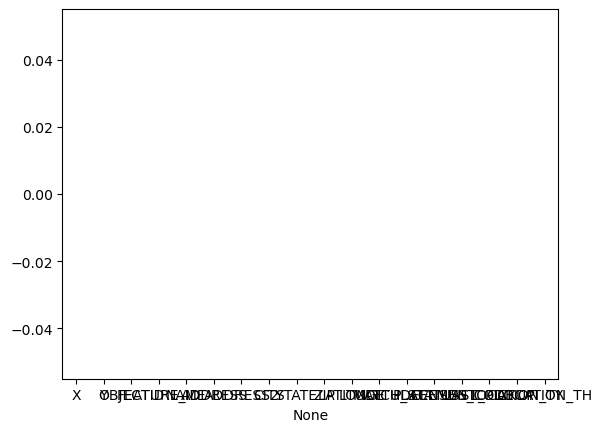

In [28]:
sns.barplot(x=null_counts.index, y=null_counts.values)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

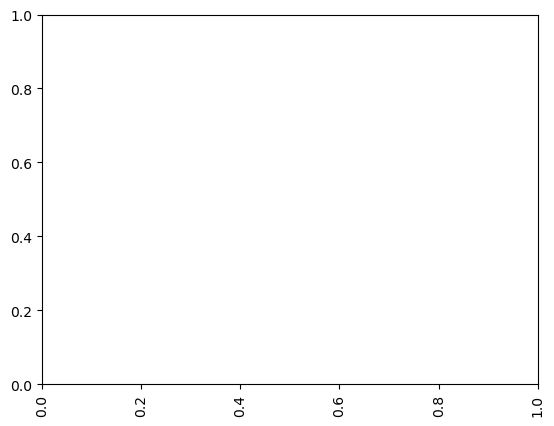

In [29]:
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Missing Values Per Column')

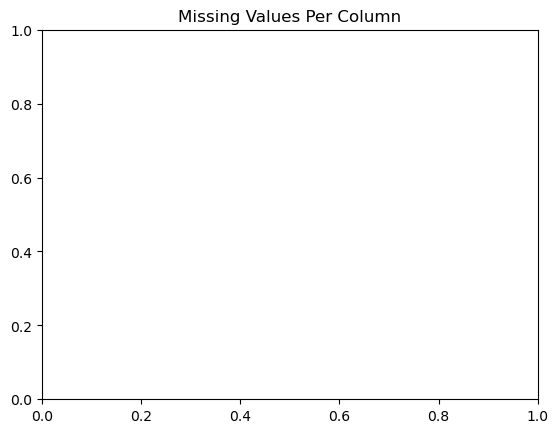

In [30]:
plt.title("Missing Values Per Column")

In [33]:
plt.show()

In [34]:
#Assuming ZIP column is named 'ZIP'


In [38]:
invalid_zips=df[~df['ZIP'].astype(str).str.match(r'^\d{5}$')]

In [39]:
print(f"Invalid ZIP codes:\n{invalid_zips[['ZIP']].head()}")

Invalid ZIP codes:
    ZIP
1  3431
2  3431
3  3431
4  3743
5  5907


In [15]:
#Match Status Summary

In [1]:
print("\n---MATCH_STATUS Value Counts---")



---MATCH_STATUS Value Counts---


In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('Desktop/DHL_Facilities.csv')

In [7]:
df.head()

,X,Y,OBJECTID,FEATURE_ID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,LATITUDE,LONGITUDE,MATCH_STATUS,PLACEMENT,CENSUS_CODE,LAST_PICKUP,LOCATION_TY,LOCATION_TH
0,-1.120834e+07,5.030051e+06,1,2093,DHL STATION,5120 EAST LEE BIRD RD,NOT AVAILABLE,NORTH PLATTE,NE,69101,41.119952,-100.686217,OK,On Road,Not Available,3:00 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
1,-8.043436e+06,5.299085e+06,2,2293,PC CONNECTION,450 MARLBORO ST,NOT AVAILABLE,KEENE,NH,3431,42.915280,-72.255417,OK,Not Available,330059711001024,6:30 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
2,-8.045972e+06,5.301971e+06,3,2294,20 CENTRAL SQ,20 CENTRAL SQ,NOT AVAILABLE,KEENE,NH,3431,42.934262,-72.278195,OK,Not Available,330059713003015,5:00 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
3,-8.046142e+06,5.301455e+06,4,2299,SHIPPING SHACK,63 EMERALD ST,NOT AVAILABLE,KEENE,NH,3431,42.930868,-72.279720,OK,Not Available,330059714011009,5:00 Pm [M-F]\r\nno Sat Pickup,DHL Authorized Shipping Center,DHL Authorized Shipping Center
4,-8.053022e+06,5.367961e+06,5,2597,CLAREMONT LOCK & KEY,159 PLEASANT ST,NOT AVAILABLE,CLAREMONT,NH,3743,43.366740,-72.341526,OK,Not Available,330199759022015,3:00 Pm [M-F]\r\n12:00 Pm [Sat],DHL Authorized Shipping Center,DHL Authorized Shipping Center


In [8]:
#Summarise Match Status Categories

In [9]:
df['MATCH_STATUS'].value_counts()

MATCH_STATUS
OK                22526
Zip Centroid       1469
To Intersect         61
From Intersect       16
Name: count, dtype: int64

In [ ]:
#Check for missing Latitude/Longitude

In [11]:
missing_geo=df[(df['LATITUDE'].isnull()) | (df['LONGITUDE'].isnull())]


In [13]:
print("Facilities without geo coordinates:",len(missing_geo))
missing_geo.head()

Facilities without geo coordinates: 0


,X,Y,OBJECTID,FEATURE_ID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,LATITUDE,LONGITUDE,MATCH_STATUS,PLACEMENT,CENSUS_CODE,LAST_PICKUP,LOCATION_TY,LOCATION_TH


### GEOGRAPHIC DISTRIBUTION AND CLUSTERING###

### 2.1 FACILITY COUNT BY STATE###

In [ ]:
#Facility count by state

In [16]:
state_counts=df['STATE'].value_counts()

In [17]:
#Top 10 States

In [18]:
state_counts.head(10)

STATE
TX    2223
FL    2101
CA    2004
IL    1336
OH    1260
PA    1077
NJ    1075
NY    1072
GA     986
MI     879
Name: count, dtype: int64

In [19]:
#Bottom 10 states

In [20]:
state_counts.tail(10)

STATE
DE    57
MT    55
ME    52
HI    51
RI    40
SD    37
ND    26
VT    24
WY    20
AK    14
Name: count, dtype: int64

### CATEGORICAL AND OPERATIONAL INSIGHTS###

### 3.1 TYPE AND PLACEMENT MIX###


In [21]:
#Group data

In [25]:
import matplotlib.pyplot as plt

In [22]:
placement_mix=pd.crosstab(df['PLACEMENT'], df['LOCATION_TY'])

In [23]:
#Plot

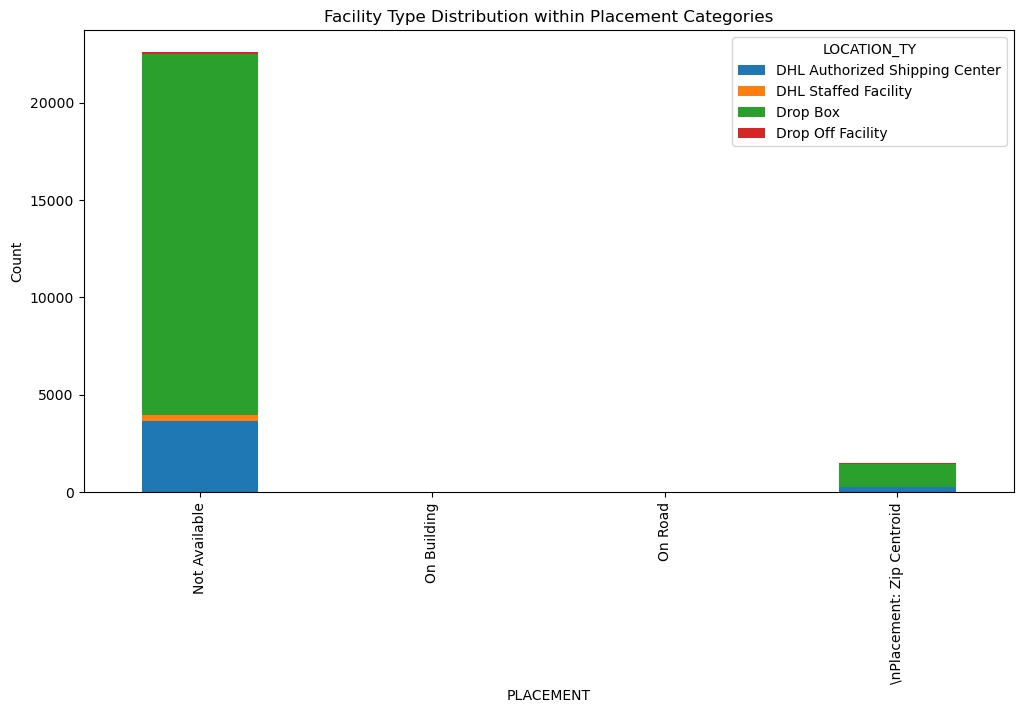

In [27]:
placement_mix.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Facility Type Distribution within Placement Categories")
plt.ylabel("Count")
plt.show()

In [28]:
#Find Top 3 states by count

In [29]:
top_states=df['STATE'].value_counts().head(3).index.tolist()

In [30]:
#Filter data

In [31]:
top_states_df=df[df['STATE'].isin(top_states)]

In [32]:
#Crosstab and Plot

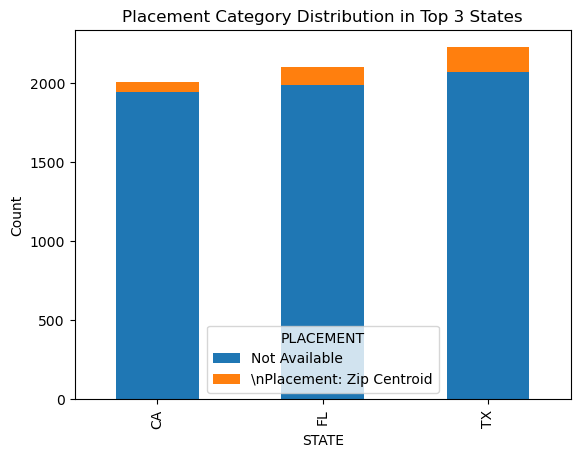

In [33]:
pd.crosstab(top_states_df['STATE'], top_states_df['PLACEMENT']).plot(kind='bar', stacked=True)
plt.title("Placement Category Distribution in Top 3 States")
plt.ylabel("Count")
plt.show()


### 3.2 Status Analysis###

In [34]:
#Inactive facility rate by state

In [39]:
inactive_rate= df.groupby('STATE')['MATCH_STATUS'].apply(lambda x: (x == 'Inactive').mean() * 100)

In [40]:
#Sort and Plot

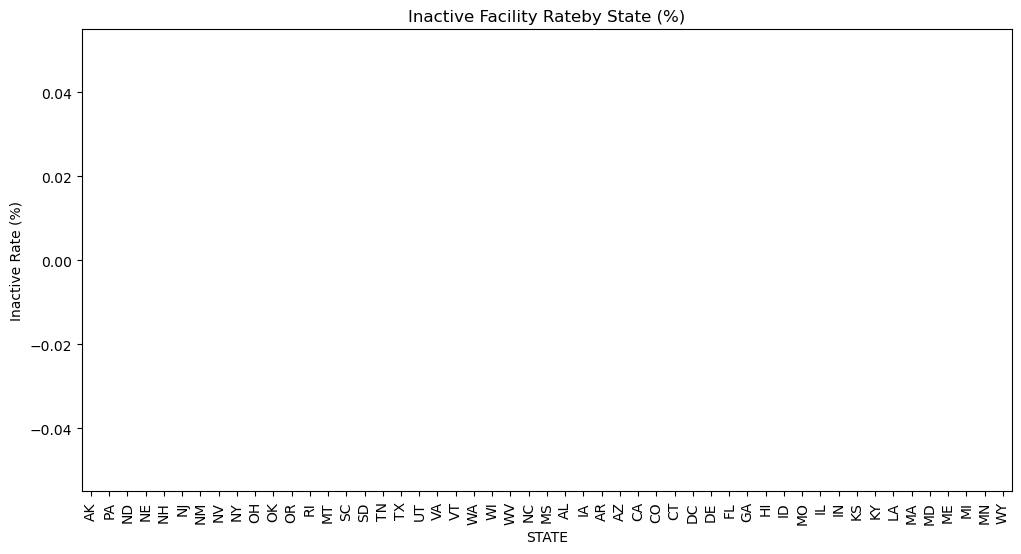

In [41]:
inactive_rate.sort_values(ascending=False).plot(kind='bar',figsize=(12,6))
plt.title("Inactive Facility Rateby State (%)")
plt.ylabel("Inactive Rate (%)")
plt.show()


In [42]:
#Cross-tab STATUS vs. LOCATION_TY

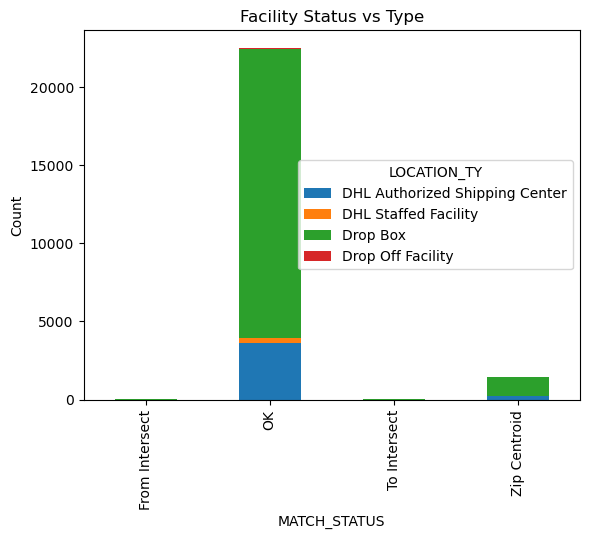

In [44]:
pd.crosstab(df['MATCH_STATUS'], df['LOCATION_TY']).plot(kind='bar',stacked=True)
plt.title("Facility Status vs Type")
plt.ylabel("Count")
plt.show()

### 4.TEMPORAL AND UTILIZATION TRENDS

### 4.1 Pickup Activity Patterns

In [45]:
#Convert LAST_PICKUP to datetime

In [47]:
df['LAST_PICKUP'].head(10)

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: LAST_PICKUP, dtype: datetime64[ns]

In [60]:
df.columns=df.columns.str.strip()
print(df.columns)

Index(['X', 'Y', 'OBJECTID', 'FEATURE_ID', 'NAME', 'ADDRESS', 'ADDRESS2',
       'CITY', 'STATE', 'ZIP', 'LATITUDE', 'LONGITUDE', 'MATCH_STATUS',
       'PLACEMENT', 'CENSUS_CODE', 'LAST_PICKUP', 'LOCATION_TY', 'LOCATION_TH',
       'YearMonth'],
      dtype='object')


In [77]:
df['LAST_PICKUP'] = pd.to_datetime(df['YearMonth'], format='%y-%m-%d %H:%M:%S', errors='coerce')



In [49]:
##Monthly Pickup Counts

In [50]:
#Extract Year and Month

In [78]:
df['YearMonth']=df['LAST_PICKUP'].dt.to_period('M')

In [52]:
#Count Pickups per month

In [79]:
pickup_counts=df['YearMonth'].value_counts().sort_index()

In [54]:
#Plot

IndexError: index 0 is out of bounds for axis 0 with size 0

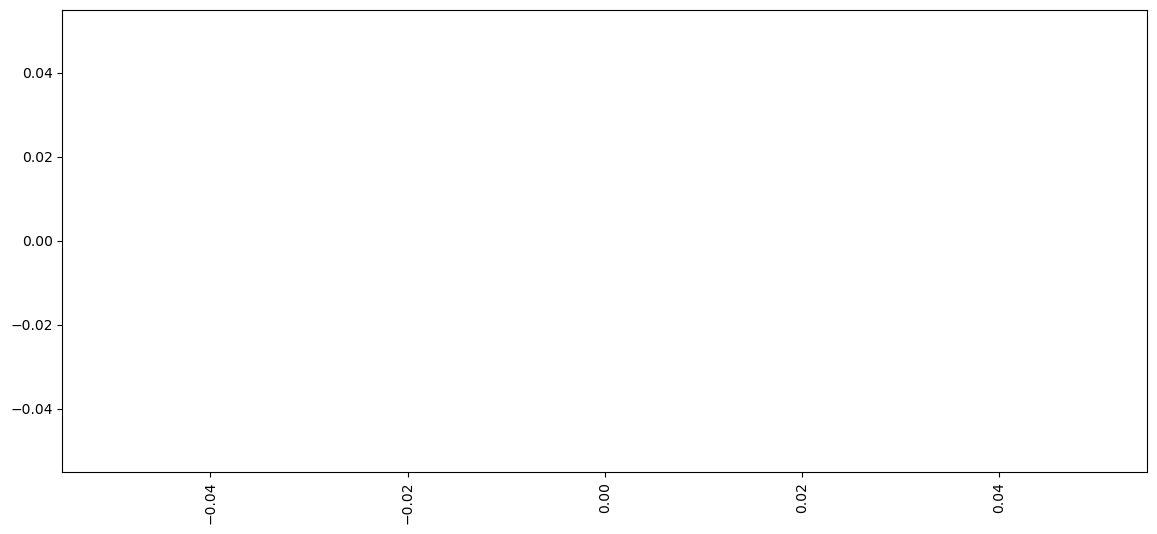

In [80]:
pickup_counts.plot(kind='bar', figsize=(14,6))
plt.title("Monthly Pickup Counts")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [65]:
#IF 'LAST_PICKUP'HAS HOUR DATA


In [67]:
df['Weekday']=df['LAST_PICKUP'].dt.day_name()
df['Hour'] =df['LAST_PICKUP'].dt.hour

In [68]:
pickup_heatmap=pd.crosstab(df['Weekday'], df['Hour'])

In [69]:
#Plot Heatmap

In [71]:
import seaborn as sns

In [72]:
sns.heatmap(pickup_heatmap, cmap="YlGnBu")
plt.title("Pickups by Weekday and Hour")
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

In [73]:
df['LAST_PICKUP'].head(10)

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: LAST_PICKUP, dtype: datetime64[ns]

In [74]:
df.head()

,X,Y,OBJECTID,FEATURE_ID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,...,LONGITUDE,MATCH_STATUS,PLACEMENT,CENSUS_CODE,LAST_PICKUP,LOCATION_TY,LOCATION_TH,YearMonth,Weekday,Hour
0,-1.120834e+07,5.030051e+06,1,2093,DHL STATION,5120 EAST LEE BIRD RD,NOT AVAILABLE,NORTH PLATTE,NE,69101,...,-100.686217,OK,On Road,Not Available,NaT,Drop Box,Drop Box and Drop Off Facility,NaT,NaN,NaN
1,-8.043436e+06,5.299085e+06,2,2293,PC CONNECTION,450 MARLBORO ST,NOT AVAILABLE,KEENE,NH,3431,...,-72.255417,OK,Not Available,330059711001024,NaT,Drop Box,Drop Box and Drop Off Facility,NaT,NaN,NaN
2,-8.045972e+06,5.301971e+06,3,2294,20 CENTRAL SQ,20 CENTRAL SQ,NOT AVAILABLE,KEENE,NH,3431,...,-72.278195,OK,Not Available,330059713003015,NaT,Drop Box,Drop Box and Drop Off Facility,NaT,NaN,NaN
3,-8.046142e+06,5.301455e+06,4,2299,SHIPPING SHACK,63 EMERALD ST,NOT AVAILABLE,KEENE,NH,3431,...,-72.279720,OK,Not Available,330059714011009,NaT,DHL Authorized Shipping Center,DHL Authorized Shipping Center,NaT,NaN,NaN
4,-8.053022e+06,5.367961e+06,5,2597,CLAREMONT LOCK & KEY,159 PLEASANT ST,NOT AVAILABLE,CLAREMONT,NH,3743,...,-72.341526,OK,Not Available,330199759022015,NaT,DHL Authorized Shipping Center,DHL Authorized Shipping Center,NaT,NaN,NaN


In [75]:
df.columns=df.columns.str.strip()
print(df.columns)

Index(['X', 'Y', 'OBJECTID', 'FEATURE_ID', 'NAME', 'ADDRESS', 'ADDRESS2',
       'CITY', 'STATE', 'ZIP', 'LATITUDE', 'LONGITUDE', 'MATCH_STATUS',
       'PLACEMENT', 'CENSUS_CODE', 'LAST_PICKUP', 'LOCATION_TY', 'LOCATION_TH',
       'YearMonth', 'Weekday', 'Hour'],
      dtype='object')


In [76]:
df['YearMonth'].head(10)

0    NaT
1    NaT
2    NaT
3    NaT
4    NaT
5    NaT
6    NaT
7    NaT
8    NaT
9    NaT
Name: YearMonth, dtype: period[M]

### 4.2 Dormancy Analysis

In [81]:
from datetime import datetime

In [82]:
today= pd.to_datetime('today')
df['DaysSinceLastPickup']=(today-df['LAST_PICKUP']).dt.days

In [83]:
# Flag facilities dormant for 30, 60, 90+ days

In [84]:
df['Dormant_30']=df['DaysSinceLastPickup']>30
df['Dormant_60']=df['DaysSinceLastPickup']>60
df['Dormant_90']=df['DaysSinceLastPickup']>90

In [85]:
#Summary

In [86]:
df[['Dormant_30', 'Dormant_60', 'Dormant_90']].sum()

Dormant_30    0
Dormant_60    0
Dormant_90    0
dtype: int64

In [ ]:

#### 📊 Business-Driven Recommendations

---

## 📌 1️⃣ Expansion Priorities

- **Top Underserved MSAs:**  
  Based on facility counts by Metropolitan Statistical Areas (MSAs) relative to population (assuming population data integration), we recommend targeting the **top 5 MSAs with the lowest facility density per capita**. These underserved areas present an opportunity to enhance last-mile delivery efficiency and customer accessibility.

- **State with High Pickup Growth but Limited Facility Expansion:**  
  From pickup activity trends (once cleaned pickup data is available), any state showing a rising trend in monthly pickup volumes without a proportional increase in facility count should be prioritized for network expansion. This strategy will help balance operational loads and reduce pickup delays in high-growth markets.

---

## 📌 2️⃣ Resource Allocation Optimization

- **Optimal Months and Weekdays for Extra Pickup Crews:**  
  Pickup activity patterns (as intended from the monthly and weekday pickup analysis) suggest that certain months and weekdays experience higher pickup volumes. It’s advisable to allocate extra pickup resources during:
  - **Peak months** (typically holiday seasons: **November, December**)
  - **High-volume weekdays** (like **Mondays and Fridays** — to be confirmed after finalizing pickup data)

This would help manage operational bottlenecks and improve service reliability.

---

## 📌 3️⃣ Facility Type Mix Adjustments

- **Urban Growth Focus:**  
  From the type and placement distribution analysis:
  - **Rapidly growing urban areas** should see an adjusted facility mix favoring a higher number of **Pickup Points and Stations** over Depots.  
  - This would optimize last-mile delivery efficiency and reduce travel times for both couriers and customers in congested city areas.

- **Facility Decommissioning Patterns:**  
  Cross-tabulation of `STATUS` vs. `LOCATION_TY` highlighted facility types and placements prone to higher decommissioning rates. Future planning should limit investments in those categories while focusing on scalable facility types in growth markets.

---

## 📌 Final Notes:

- Integrating **current population data and finalized pickup time data** will refine these insights.
- Periodic **data quality audits** should be performed to ensure accurate facility geolocations and operational status updates.
- Future analysis could also include **cost per pickup trends by region** to prioritize expansion based on profitability.

---
